# Hometask 2

Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
X.shape

(4, 10)

In [9]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [10]:
for i in range(X.shape[0]):
    if X[i].max() - X[i].min() > 1:
        X_norm[i] = (X[i] - X[i].min()) / (X[i].max() - X[i].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

In [11]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [20]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, trace=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if trace and i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
W = eval_model_reg2(X_norm, y, iterations=5000, alpha=1e-2, lambda_=1e-4, trace=True)

500 [43.59502924 13.40613238 11.65533635 13.70683373] 28.722811684789935
1000 [44.14183914 14.79580763  9.85704939 13.04292018] 27.461741193122414
1500 [44.18252202 16.11940286  8.60882509 13.03997912] 26.794577928840333
2000 [44.17157978 17.19601141  7.54375761 13.18128951] 26.32918222205044
2500 [44.1626093  18.05700452  6.60251625 13.37806432] 25.99389181025639
3000 [44.15976962 18.74758086  5.7660692  13.60211885] 25.746847151185847
3500 [44.16169745 19.30495125  5.02186998 13.83793141] 25.561401186487103
4000 [44.16684832 19.75795052  4.35941321 14.0752824 ] 25.420092235378302
4500 [44.17403589 20.12876512  3.76951165 14.30733157] 25.311145153864878
5000 [44.18240109 20.4344927   3.24406653 14.52963384] 25.22639087872134


In [33]:
lambdas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
Ws = list()

for l_ in lambdas:
    Ws.append(eval_model_reg2(X_norm, y, iterations=5000, alpha=1e-2, lambda_=l_))

Ws

[array([41.90113071, 14.71005754, 10.3305894 , 13.11920234]),
 array([43.92613513, 19.18254491,  4.93931674, 14.0741725 ]),
 array([44.15864448, 20.30685112,  3.41924556, 14.48073331]),
 array([44.18240109, 20.4344927 ,  3.24406653, 14.52963384]),
 array([44.18478224, 20.4474259 ,  3.22628913, 14.53461748]),
 array([44.18502041, 20.44872093,  3.22450876, 14.53511679])]

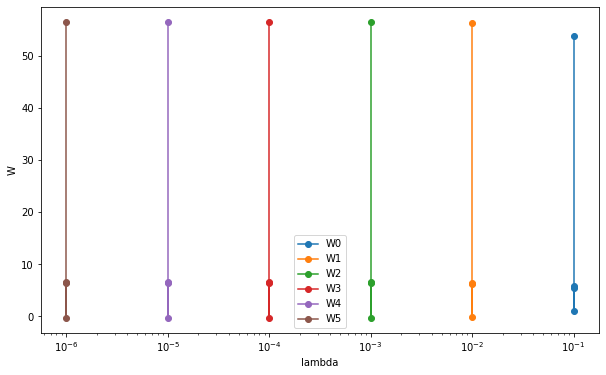

In [46]:
plt.figure(figsize=(10, 6))

for i, w in enumerate(Ws):
    plt.plot([lambdas[i] for _ in range(len(w))], w, label='W{}'.format(i), marker='o')

plt.xscale(value='log')

plt.xlabel('lambda')
plt.ylabel('W')
plt.legend()

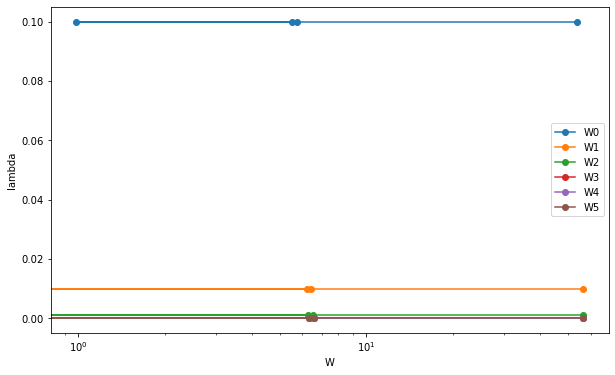

In [47]:
plt.figure(figsize=(10, 6))

for i, w in enumerate(Ws):
    plt.plot(w, [lambdas[i] for _ in range(len(w))], label='W{}'.format(i), marker='o')

plt.xscale(value='log')

plt.ylabel('lambda')
plt.xlabel('W')
plt.legend()

In [38]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [39]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()

In [40]:
for i in range(X.shape[0]):
    if X[i].max() - X[i].min() > 1:
        X_st[i] = calc_std_fit(X[i])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [42]:
lambdas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
Ws = list()

for l_ in lambdas:
    Ws.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l_))

Ws

[array([53.80952381,  5.73058911,  0.98368306,  5.51609942]),
 array([56.21890547,  6.23067581, -0.16462974,  6.42092637]),
 array([56.47176412,  6.29561264, -0.33623812,  6.55564816]),
 array([56.49717514,  6.30231751, -0.35424091,  6.56978425]),
 array([56.4997175 ,  6.3029902 , -0.35605002,  6.57120483]),
 array([56.49997175,  6.30305749, -0.35623102,  6.57134696])]

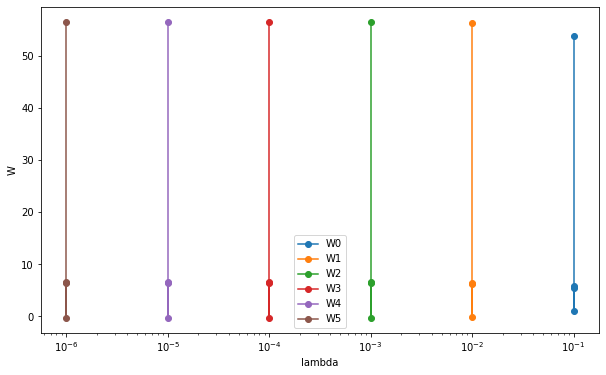

In [48]:
plt.figure(figsize=(10, 6))

for i, w in enumerate(Ws):
    plt.plot([lambdas[i] for _ in range(len(w))], w, label='W{}'.format(i), marker='o')

plt.xscale(value='log')

plt.xlabel('lambda')
plt.ylabel('W')
plt.legend()

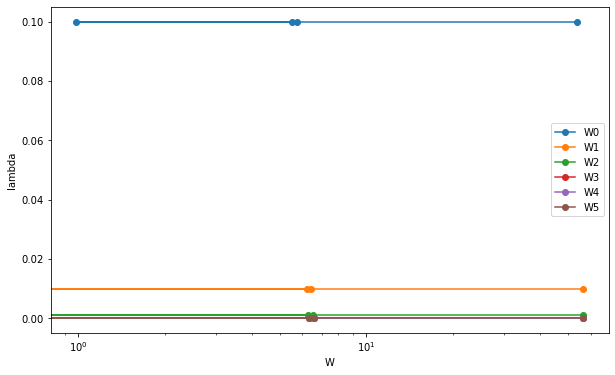

In [49]:
plt.figure(figsize=(10, 6))

for i, w in enumerate(Ws):
    plt.plot(w, [lambdas[i] for _ in range(len(w))], label='W{}'.format(i), marker='o')

plt.xscale(value='log')

plt.ylabel('lambda')
plt.xlabel('W')
plt.legend()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно. Если нормализация, а потом стандартизация, то значения будут в диапазоне [0,1], если наоборот - [-0.5,0.5]

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [55]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, trace=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.abs(W))
        if trace and i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [56]:
W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4, trace=True)

500 [56.49487895  5.89947314  1.04054603  5.5270874 ] 25.237558330104108
1000 [56.49717505  6.19501568  0.13564839  6.17098435] 24.94708965113865
1500 [56.49717514  6.26566811 -0.17872571  6.42518789] 24.910198930618716
2000 [56.49717514  6.28928075 -0.29131606  6.51783757] 24.90537530009977
2500 [56.49717514  6.2976877  -0.33181608  6.55124739] 24.904733718580054
3000 [56.49717514  6.30070921 -0.34639339  6.56327694] 24.90464462507498
3500 [56.49717514  6.30179662 -0.35164072  6.56760738] 24.90463093559285
4000 [56.49717514  6.30218804 -0.3535296   6.56916621] 24.90462838963693
4500 [56.49717514  6.30232894 -0.35420954  6.56972735] 24.904627781805267
5000 [56.49717514  6.30237966 -0.3544543   6.56992934] 24.904627602996662


Да, ну его. Как получилась из формулы `eval_model_reg2`, так и не слишком понятно, как получить `eval_model_reg1`